## Gráficos avanzados
### Rodrigo Barrera

In [ ]:
import pkg_resources
import subprocess
import sys

REQUIRED_PACKAGES = [
    'dash',
    'plotly',
    'joypy'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) está instalado'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} no está instalado. Instalando...'.format(package))
        subprocess.call([sys.executable, '-m', 'pip', 'install', package])
    except pkg_resources.ContextualVersionConflict:
        print('Conflicto de versión detectado para el paquete {}. Desinstalando la versión actual...'.format(package))
        subprocess.call([sys.executable, '-m', 'pip', 'uninstall', '-y', package])
        print('Instalando {}...'.format(package))
        subprocess.call([sys.executable, '-m', 'pip', 'install', package])



Conflicto de versión detectado para el paquete dash. Desinstalando la versión actual...
Instalando dash...
plotly (5.13.1) está instalado
joypy no está instalado. Instalando...


In [ ]:
import yfinance as yf
import mplfinance as mpf

data = yf.download('AAPL', start='2020-01-01', end='2020-12-31')


[*********************100%***********************]  1 of 1 completed


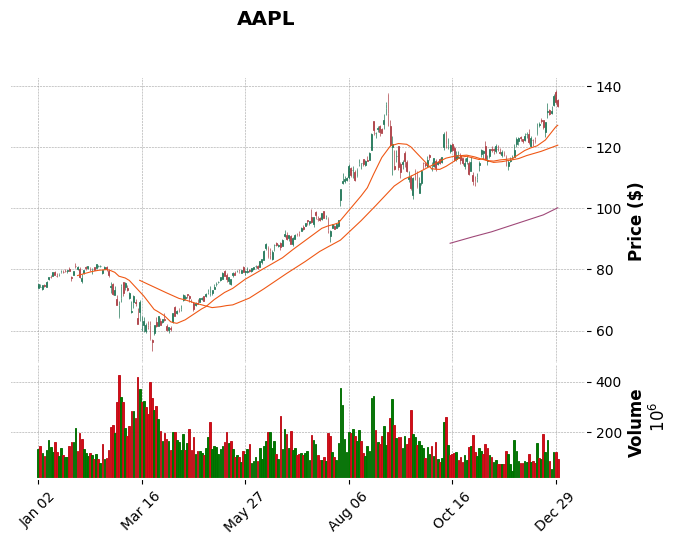

In [ ]:
mpf.plot(data, type='candle', style='charles', title='AAPL',
         ylabel='Price ($)', ylabel_lower='Volume', volume=True, mav=(20,50,200))

In [1]:
import plotly.graph_objects as go
import yfinance as yf

# Descargar los datos
data = yf.download('AAPL', start='2020-01-01', end='2020-12-31')

# Crear un objeto de figura vacío
fig = go.Figure(
    data=[go.Scatter(x=data.index[:1], y=data['Close'][:1])],
    layout=go.Layout(
        xaxis=dict(range=[min(data.index), max(data.index)], autorange=False),
        yaxis=dict(range=[min(data['Close']), max(data['Close'])], autorange=False),
        title="Inicio: " + str(data.index[0])
    ),
    frames=[go.Frame(
        data=[go.Scatter(
            x=data.index[:k+1],
            y=data['Close'][:k+1])],
        layout=go.Layout(
            title="Inicio: " + str(data.index[k]))
    ) for k in range(1, len(data))]
)

# Definir la animación
animation_settings = {
    'frame': {'duration': 2, 'redraw': False},
    'fromcurrent': True,
    'transition': {'duration': 0}
}

# Agregar botón de Play al gráfico
fig.layout.updatemenus = [
    {
        'buttons': [
            {
                'args': [None, animation_settings],
                'label': 'Play',
                'method': 'animate'
            }
        ],
        'showactive': False,
        'type': 'buttons'
    }
]

fig.show()




[*********************100%%**********************]  1 of 1 completed


In [ ]:
import plotly.subplots as sp
import yfinance as yf

# Descargar los datos
start_date = '2020-01-01'
end_date = '2020-12-31'
data_clp = yf.download('USDCLP=X', start=start_date, end=end_date)
data_ars = yf.download('USDARS=X', start=start_date, end=end_date)
data_pen = yf.download('USDPEN=X', start=start_date, end=end_date)

# Crear un objeto de figura vacío con 3 subplots
fig = sp.make_subplots(rows=3, cols=1)

# Agregar las series al gráfico
fig.add_trace(go.Scatter(x=data_clp.index, y=data_clp['Close'], name="USD/CLP"), row=1, col=1)
fig.add_trace(go.Scatter(x=data_ars.index, y=data_ars['Close'], name="USD/ARS"), row=2, col=1)
fig.add_trace(go.Scatter(x=data_pen.index, y=data_pen['Close'], name="USD/PEN"), row=3, col=1)

fig.show()




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


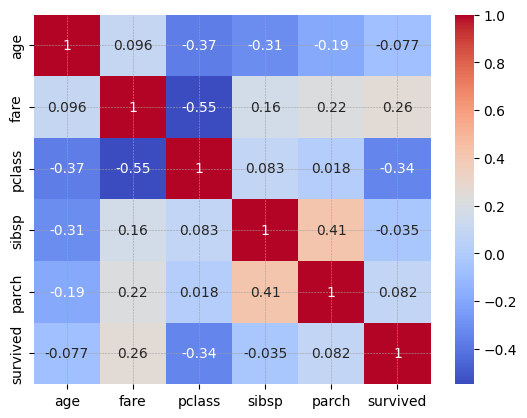

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Titanic
titanic = sns.load_dataset('titanic')

# Seleccionar variables numéricas
numerical_titanic = titanic[["age", "fare", "pclass", "sibsp", "parch", "survived"]]

# Creamos la matriz de correlaciones
correlation_matrix = numerical_titanic.corr()

# Creamos el correlograma
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


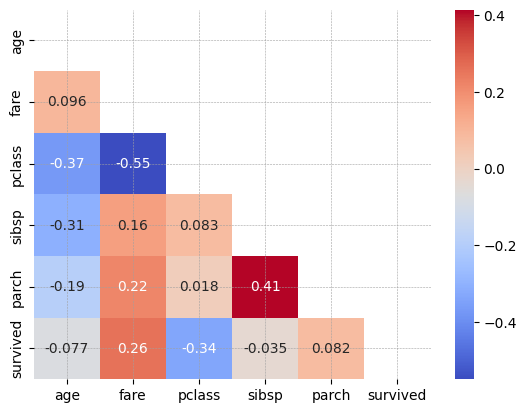

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el conjunto de datos Titanic
titanic = sns.load_dataset('titanic')

# Seleccionar variables numéricas
numerical_titanic = titanic[["age", "fare", "pclass", "sibsp", "parch", "survived"]]

# Creamos la matriz de correlaciones
correlation_matrix = numerical_titanic.corr()

# Creamos una máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Creamos el mapa de calor de correlación con la máscara
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')

plt.show()


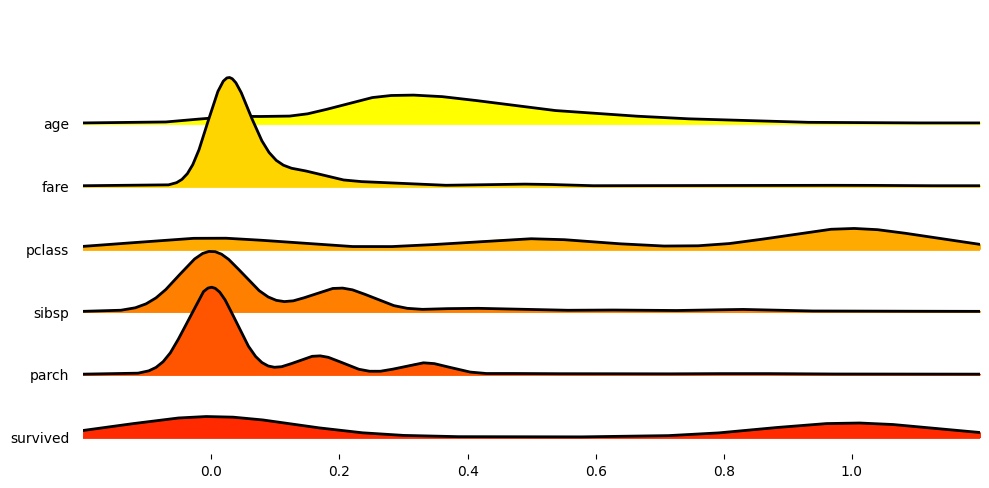

In [ ]:
import joypy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler

# Cargar el conjunto de datos Titanic
titanic = sns.load_dataset('titanic')

# Seleccionar variables numéricas y eliminar NaN
numerical_titanic = titanic[["age", "fare", "pclass", "sibsp", "parch", "survived"]].dropna()

# Normalizar los datos
scaler = MinMaxScaler()
scaled_titanic = pd.DataFrame(scaler.fit_transform(numerical_titanic), columns=numerical_titanic.columns)

# Crear el gráfico de Ridgeline
fig, axes = joypy.joyplot(scaled_titanic, colormap=cm.autumn_r, figsize=(10,5))

plt.show()




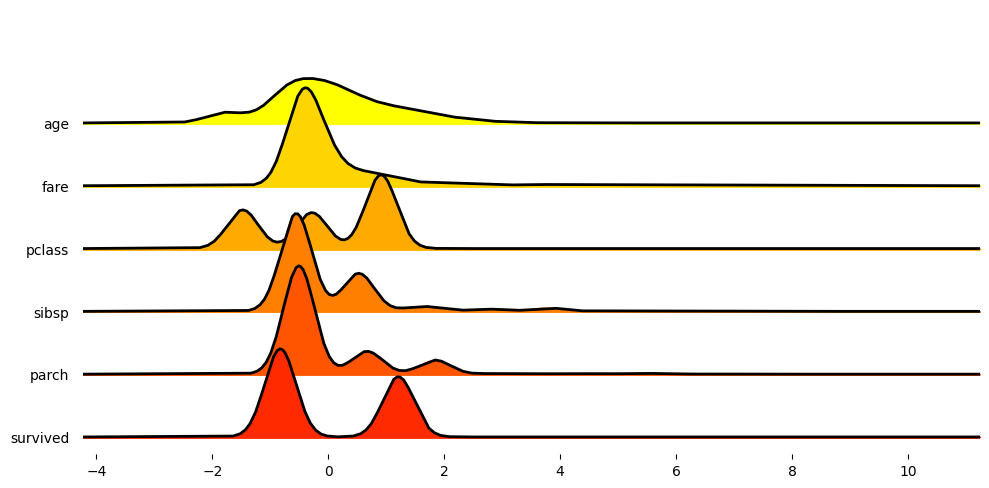

In [ ]:
import joypy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Titanic
titanic = sns.load_dataset('titanic')

# Seleccionar variables numéricas y eliminar NaN
numerical_titanic = titanic[["age", "fare", "pclass", "sibsp", "parch", "survived"]].dropna()

# Estandarizar los datos
scaler = StandardScaler()
standardized_titanic = pd.DataFrame(scaler.fit_transform(numerical_titanic), columns=numerical_titanic.columns)

# Crear el gráfico de Ridgeline
fig, axes = joypy.joyplot(standardized_titanic, colormap=cm.autumn_r, figsize=(10,5))

plt.show()


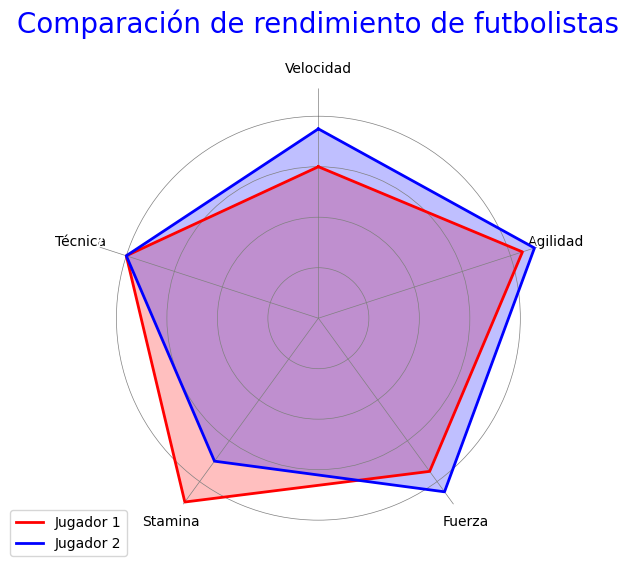

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Generar datos de rendimiento ficticios
labels=np.array(['Velocidad', 'Agilidad', 'Fuerza', 'Stamina', 'Técnica'])
num_vars = len(labels)

# Datos de rendimiento para dos futbolistas
player1 = np.array([60, 85, 75, 90, 80])
player2 = np.array([75, 90, 85, 70, 80])

# Calcular el ángulo de cada eje en el gráfico de radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Los datos del radar se repiten al principio para cerrar el círculo
player1 = np.concatenate((player1, [player1[0]]))
player2 = np.concatenate((player2, [player2[0]]))
angles += angles[:1]

# Crear figura y subtrama
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Añadir jugador 1 al gráfico de radar
ax.plot(angles, player1, color='red', linewidth=2, linestyle='solid', label='Jugador 1')
ax.fill(angles, player1, color='red', alpha=0.25)

# Añadir jugador 2 al gráfico de radar
ax.plot(angles, player2, color='blue', linewidth=2, linestyle='solid', label='Jugador 2')
ax.fill(angles, player2, color='blue', alpha=0.25)

# Añadir etiquetas
ax.set_yticklabels([])
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Añadir leyenda y título
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Comparación de rendimiento de futbolistas', size=20, color='blue', y=1.1)

# Añadir grid y líneas de base
ax.xaxis.grid(True, color='gray', linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color='gray', linestyle='solid', linewidth=0.5)

plt.show()



<ipython-input-31-eb1941a0cb63>:26: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



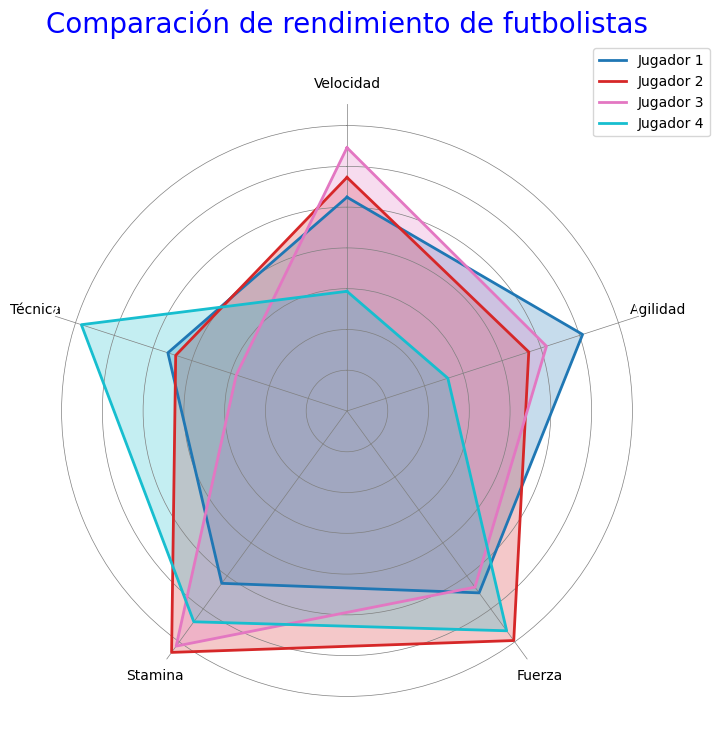

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro de número de jugadores
num_players = 4

# Generar datos de rendimiento ficticios
labels = np.array(['Velocidad', 'Agilidad', 'Fuerza', 'Stamina', 'Técnica'])
num_vars = len(labels)

# Crear datos aleatorios para los jugadores
np.random.seed(0)
data = 50 + 100 * np.random.rand(num_players, num_vars)
player_data = [np.concatenate((d, [d[0]])) for d in data]

# Calcular el ángulo de cada eje en el gráfico de radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Crear figura y subtrama
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Añadir jugadores al gráfico de radar usando un bucle
colors = plt.cm.get_cmap('tab10', num_players)  # Obtener colores diferentes para cada jugador
for i in range(num_players):
    ax.plot(angles, player_data[i], color=colors(i), linewidth=2, linestyle='solid', label=f'Jugador {i+1}')
    ax.fill(angles, player_data[i], color=colors(i), alpha=0.25)

# Añadir etiquetas
ax.set_yticklabels([])
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Añadir leyenda y título
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Comparación de rendimiento de futbolistas', size=20, color='blue', y=1.1)

# Añadir grid y líneas de base
ax.xaxis.grid(True, color='gray', linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color='gray', linestyle='solid', linewidth=0.5)

plt.show()



## Actividad
Acceda a los datos de calentamiento global entregadas por la NASA y muestrelos de manera impactante.

  

https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv